In [155]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

from IPython.display import Audio


import scipy.io.wavfile as wavf


import librosa
import librosa.display

In [156]:
AUDIO_FOLDER = "short files/"
audio_files = [join(AUDIO_FOLDER, f) for f in listdir(AUDIO_FOLDER) if isfile(join(AUDIO_FOLDER,
                                                                                   f))]
print(audio_files)

['short files/clavichord.WAV', 'short files/fast.WAV', 'short files/norhythm.WAV', 'short files/normal.WAV', 'short files/organ.WAV', 'short files/skipnotes.WAV', 'short files/slow.WAV', 'short files/veryfast.WAV', 'short files/veryslow.WAV', 'short files/x_warped.WAV']


In [157]:
#MP3 does not work!
#https://github.com/librosa/librosa/issues/945

#x_1, fs = librosa.load('./short files/clavichord.WAV')
for file_name in audio_files:
    print(file_name)
    x_1, fs = librosa.load(file_name)
    #print("The time series for this file is", x_1[:10])
    print("The length of the time series is", len(x_1))
    print("The sampling rate of the file is", fs)
    print()

short files/clavichord.WAV
The length of the time series is 357761
The sampling rate of the file is 22050

short files/fast.WAV
The length of the time series is 211393
The sampling rate of the file is 22050

short files/norhythm.WAV
The length of the time series is 271937
The sampling rate of the file is 22050

short files/normal.WAV
The length of the time series is 257729
The sampling rate of the file is 22050

short files/organ.WAV
The length of the time series is 317057
The sampling rate of the file is 22050

short files/skipnotes.WAV
The length of the time series is 214977
The sampling rate of the file is 22050

short files/slow.WAV
The length of the time series is 340161
The sampling rate of the file is 22050

short files/veryfast.WAV
The length of the time series is 135425
The sampling rate of the file is 22050

short files/veryslow.WAV
The length of the time series is 467649
The sampling rate of the file is 22050

short files/x_warped.WAV
The length of the time series is 340161


short files/slow.WAV


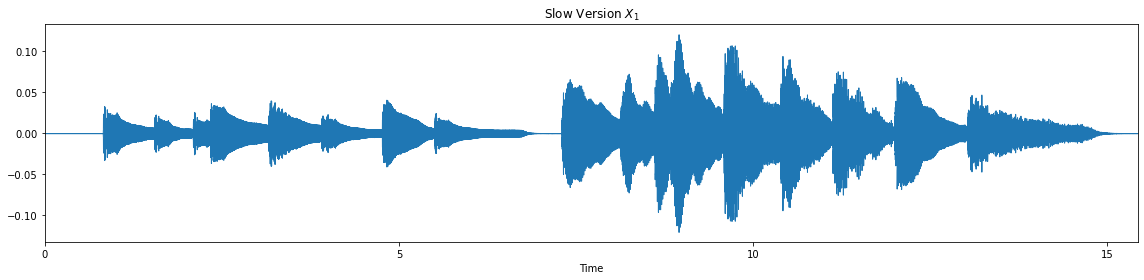

In [158]:
file_name1 = audio_files[6]
print(file_name1)
x_1, fs = librosa.load(file_name1)
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_1, sr=fs)
plt.title('Slow Version $X_1$')
plt.tight_layout()
Audio(file_name1)

short files/fast.WAV


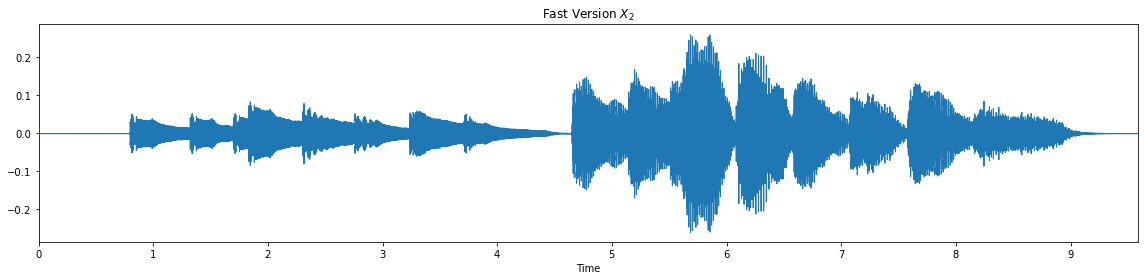

In [159]:
file_name2 = audio_files[1]
print(file_name2)
x_2, fs = librosa.load(file_name2)
plt.figure(figsize=(16, 4)) # (figsize=(16, 4))
librosa.display.waveplot(x_2, sr=fs)
plt.title('Fast Version $X_2$')
plt.tight_layout()
Audio(file_name2)

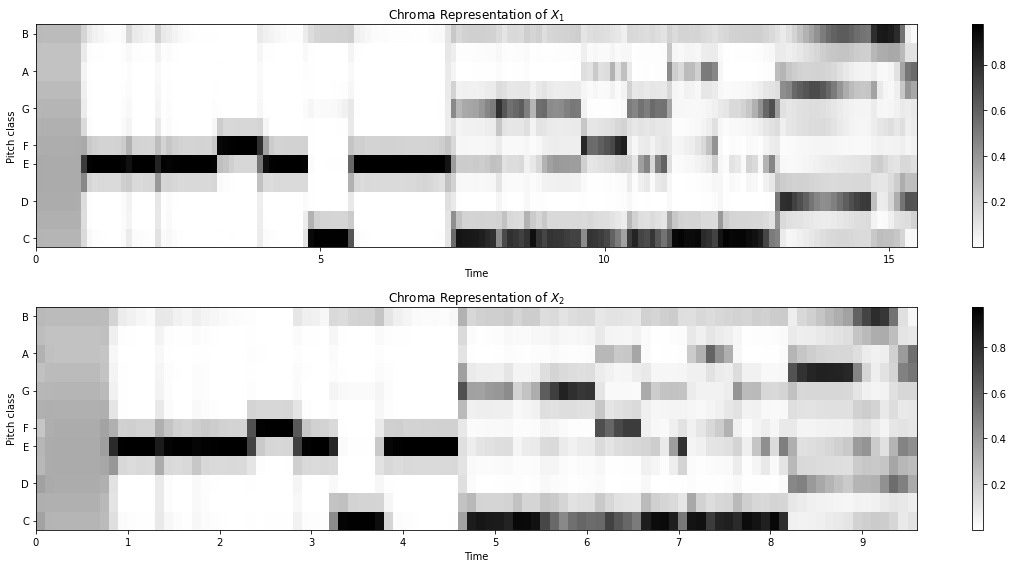

In [160]:
n_fft = 4410
hop_size = 2205

x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('Chroma Representation of $X_1$')
librosa.display.specshow(x_1_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('Chroma Representation of $X_2$')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.tight_layout()

(155, 96)
(163, 2)


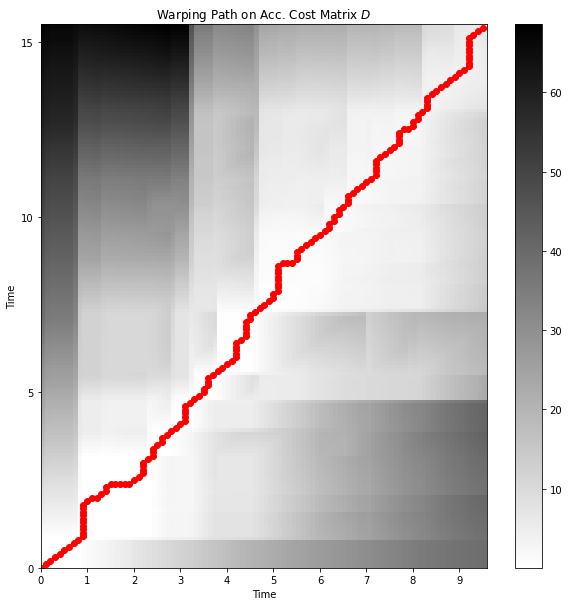

In [161]:
D, wp = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')
wp_s = np.asarray(wp) * hop_size / fs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size) #hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()
print(D.shape)
print(wp_s.shape)

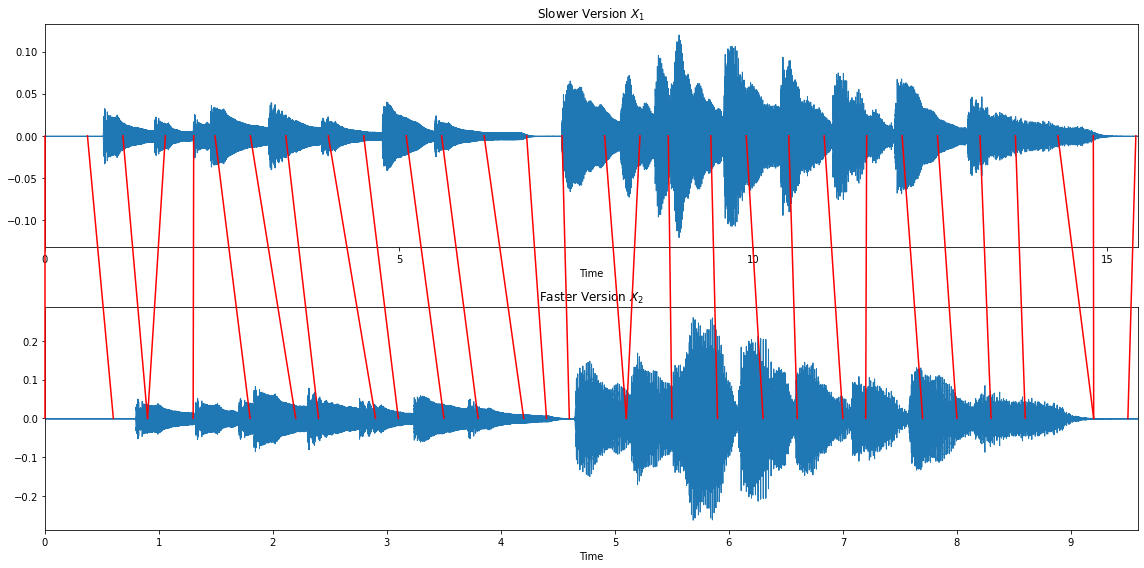

In [162]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs)
plt.title('Slower Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs)
plt.title('Faster Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()


In [163]:
np.pad(np.array([1,2,3,4]), [0,10], mode='wrap')

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2])

In [164]:
x_warped = x_1 #we copy x_1, then we stretch/shrink x_2 and add to x_warped

pairs = wp * hop_size
pairs_flip = reversed(pairs)

index1 = 0
index2 = 0

#for pair in pairs_flip: #this way gives a result with a lot of noise :'(
#    for i in range(index1, pair[0]):
#        x_warped[i] += x_2[int(index2 + (pair[1] - index2)*(pair[0] - i)/(pair[0] - index1) )]

#let's try something that gives less noise. Spoiler: It doesn't produce less noise haha
for pair in pairs_flip:
    if (index1 + pair[0]) == (index2 + pair[1]): #the arrays are already aligned
        x_warped[index1:pair[0]] += x_2[index2:pair[1]]
    
    elif (index1 + pair[0]) > (index2 + pair[1]): #array2 is smaller and must be streched
        len_to_fill = pair[0] - index1
        array_stretched = np.pad(np.array(x_2[index2:(pair[1]+1)]), [0,len_to_fill], mode='wrap')
        x_warped[index1:pair[0]] += array_stretched[:len_to_fill]        
    
    else: # (index1 + pair[0]) < (index2 + pair[1]) #array2 is bigger and must shrink
        x_warped[index1:pair[0]] += x_2[index2:(index2 + pair[0] - index1)]

    #update indexes now
    index1 = pair[0]
    index2 = pair[1]
    #print(f"{index1}, {index2}")

    
fs = 22050
out_f = './short files/x_warped.WAV'

wavf.write(out_f, fs, x_warped)
    
Audio('./short files/x_warped.WAV')